# **Sentiment Analysis of IMDB reviews**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df = df.sample(5000)

In [3]:
df.shape

(5000, 2)

**Checking whether data is balanced or not**

In [4]:
df.sentiment.value_counts()

negative    2534
positive    2466
Name: sentiment, dtype: int64

it is a binary classification. both the class have equal ration. any one class having more 75 % then it is a imbalanced dataset.

# **Pre-processing the data**

Some common Problems:
1. Remove Punctuation
2. Replace short words
3. Making text lower case
4. Remove stopwords
5. Lemmatization

In [5]:
df.review

22323    You have to understand, when Wargames was rele...
32110    Hands down the worst movie I have ever seen. I...
30201    "In 1955, Tobias Schneerbaum disappeared in th...
8216     Naturally in a film who's main themes are of m...
28726    I have seen this film numerous times and for t...
                               ...                        
4071     Dan Duryea, a perfectly decent B-movie actor w...
33107    Chang Cheh's "Shaolin Temple" might very well ...
19713    No, I'm not joking around. If you ever, EVER, ...
25914    I wasn't expecting this to be a great movie, b...
17932    OK, the other reviewers have pretty much cover...
Name: review, Length: 5000, dtype: object

In [6]:
df['cleaned_review'] = df['review'].str.replace("[^a-zA-Z0-9 ]","")

df = df[['review','cleaned_review','sentiment']]
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,review,cleaned_review,sentiment
22323,"You have to understand, when Wargames was rele...",You have to understand when Wargames was relea...,negative
32110,Hands down the worst movie I have ever seen. I...,Hands down the worst movie I have ever seen I ...,negative
30201,"""In 1955, Tobias Schneerbaum disappeared in th...",In 1955 Tobias Schneerbaum disappeared in the ...,negative
8216,Naturally in a film who's main themes are of m...,Naturally in a film whos main themes are of mo...,positive
28726,I have seen this film numerous times and for t...,I have seen this film numerous times and for t...,positive


**Replacing short words**

remove all br , html tags, is, a...etc.

In [7]:
df['cleaned_review'] = df['cleaned_review'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))
df['cleaned_review']

22323    You have understand when Wargames was released...
32110    Hands down the worst movie have ever seen thou...
30201    1955 Tobias Schneerbaum disappeared the Peruvi...
8216     Naturally film whos main themes are mortality ...
28726    have seen this film numerous times and for the...
                               ...                        
4071     Dan Duryea perfectly decent Bmovie actor who m...
33107    Chang Chehs Shaolin Temple might very well the...
19713    not joking around you ever EVER have the chanc...
25914    wasnt expecting this great movie but neither w...
17932    the other reviewers have pretty much covered t...
Name: cleaned_review, Length: 5000, dtype: object

**LowerCase character**

convert the & The to the bcz python considers The & the both as 2 different words.

In [8]:
df['cleaned_review'] = [review.lower() for review in df['cleaned_review']] 
df['cleaned_review']

22323    you have understand when wargames was released...
32110    hands down the worst movie have ever seen thou...
30201    1955 tobias schneerbaum disappeared the peruvi...
8216     naturally film whos main themes are mortality ...
28726    have seen this film numerous times and for the...
                               ...                        
4071     dan duryea perfectly decent bmovie actor who m...
33107    chang chehs shaolin temple might very well the...
19713    not joking around you ever ever have the chanc...
25914    wasnt expecting this great movie but neither w...
17932    the other reviewers have pretty much covered t...
Name: cleaned_review, Length: 5000, dtype: object

**Stop Word Removal**

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','like','see','movies','get','makes','making','time','good','watch','character']

# Adding to the list of words
stop_words.extend(add_words)

# function to remove stop words
def remove_stopwords(rev):
    # input as row/review
    # break into words, check whether it is in stop words or not.
    rev_tokenize = word_tokenize(rev)
    rev_new = " ".join([i for i in rev_tokenize  if i not in stop_words])
    return rev_new

df['cleaned_review'] = [remove_stopwords(r) for r in df['cleaned_review']]
df['cleaned_review']

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


22323    understand wargames released 1983 created gene...
32110    hands worst ever seen thought nothing would ev...
30201    1955 tobias schneerbaum disappeared peruvian a...
8216     naturally whos main themes mortality nostalgia...
28726    seen numerous times life understand people com...
                               ...                        
4071     dan duryea perfectly decent bmovie actor made ...
33107    chang chehs shaolin temple might well highwate...
19713    joking around ever ever chance need chop arm w...
25914    wasnt expecting great neither expecting awful ...
17932    reviewers pretty much covered main points grea...
Name: cleaned_review, Length: 5000, dtype: object

**Lemmatization**

1. split sentence into words 
2. get the detailed POS for each word 
3. get shallow POS from detailed POS 
4. do lemmatisation for each word 
5. join all the words to form sentence

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
    #tuple of (token, wordnet_tag)
    
    # we dont need to detailed of POS. So we convert.
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['cleaned_review'] = df['cleaned_review'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
 nltk_tagged = nltk.pos_tag(nltk.word_tokenize("This batch is awesom"))  
 print(nltk_tagged)

[('This', 'DT'), ('batch', 'NN'), ('is', 'VBZ'), ('awesom', 'JJ')]


In [12]:
df['cleaned_review']

22323    understand wargames release 1983 created gener...
32110    hand worst ever see think nothing would ever d...
30201    1955 tobias schneerbaum disappear peruvian ama...
8216     naturally whos main theme mortality nostalgia ...
28726    see numerous time life understand people compa...
                               ...                        
4071     dan duryea perfectly decent bmovie actor make ...
33107    chang chehs shaolin temple might well highwate...
19713    joke around ever ever chance need chop arm wor...
25914    wasnt expect great neither expect awful hat mo...
17932    reviewer pretty much cover main point great li...
Name: cleaned_review, Length: 5000, dtype: object

**Plotting Freqent Words**

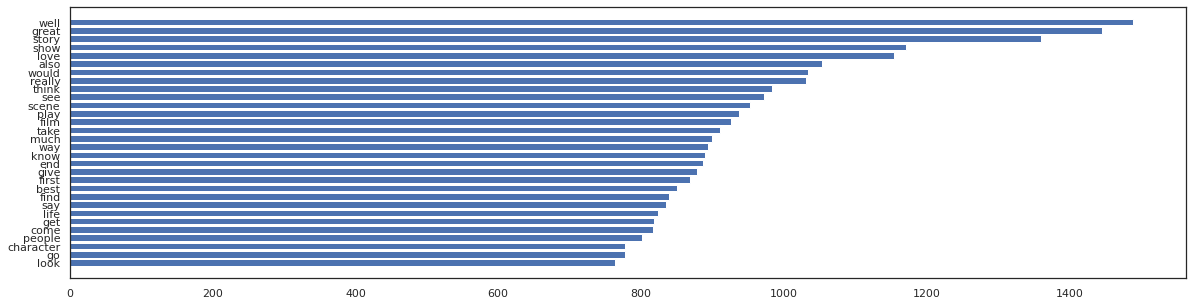

In [13]:
# Plotting most frequent words from positive reviews using bar chart

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')

# function to find the frequent words in the data
from nltk import FreqDist 

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['cleaned_review']])
all_words = all_words.split()
words_df = FreqDist(all_words)


# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})

# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

**WordCloud**

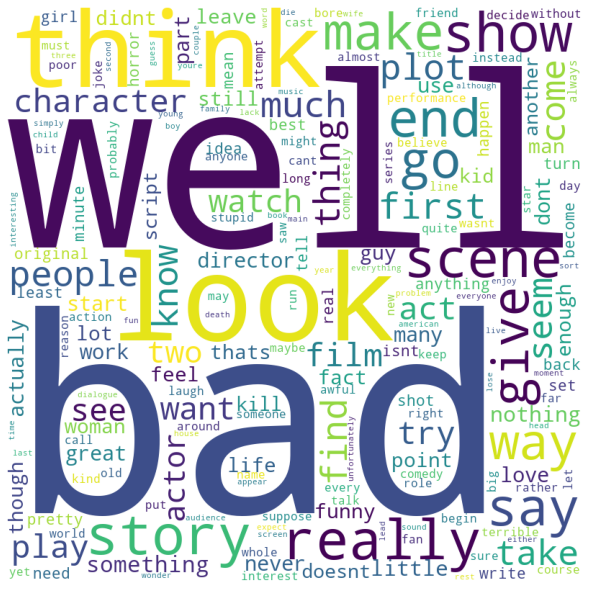

In [14]:
# Bilding a Word Cloud

from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in word_cloud_df['cleaned_review']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

**Bag of Words Model**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
# tmp_df = tfidf.fit_transform(df.review_processed)
# feature_names = tfidf.get_feature_names()
# pd.DataFrame(tmp_df.toarray(), columns = feature_names).head() 

X = tfidf.fit_transform(df.cleaned_review).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()


X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
X_train.shape, X_test.shape

((4000, 2500), (1000, 2500))

In [17]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Building the ML model**

**Feature Importance**

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[326 169]
 [167 338]]
The model accuracy is 0.664


<AxesSubplot:>

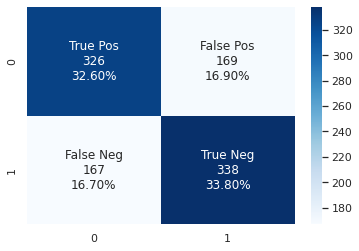

In [20]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.663946394639464

In [22]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
24,0.131814,bad
286,0.042076,waste
130,0.038545,great
23,0.022225,awful
27,0.015407,best
...,...,...
21,0.000800,weak
19,0.000750,shine
67,0.000667,vote
78,0.000640,dont


In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.7831543154315431